Fabian Rodriguez - 
Sergio Ardila - 
Juan Camilo Marín - 
Julián Velásquez


# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

In [4]:
from statsmodels.tsa.stattools import adfuller
for i in range(101):
    print(i/100)
    print('p-value: %f' % adfuller(ts(rho=i/100))[1])

0.0
p-value: 0.000000
0.01
p-value: 0.000000
0.02
p-value: 0.000000
0.03
p-value: 0.000000
0.04
p-value: 0.000000
0.05
p-value: 0.000000
0.06
p-value: 0.000000
0.07
p-value: 0.000000
0.08
p-value: 0.000000
0.09
p-value: 0.000000
0.1
p-value: 0.000000
0.11
p-value: 0.000000
0.12
p-value: 0.000000
0.13
p-value: 0.000000
0.14
p-value: 0.000000
0.15
p-value: 0.000000
0.16
p-value: 0.000000
0.17
p-value: 0.000000
0.18
p-value: 0.000000
0.19
p-value: 0.000000
0.2
p-value: 0.000000
0.21
p-value: 0.000000
0.22
p-value: 0.000000
0.23
p-value: 0.000000
0.24
p-value: 0.000000
0.25
p-value: 0.000000
0.26
p-value: 0.000000
0.27
p-value: 0.000000
0.28
p-value: 0.000084
0.29
p-value: 0.000000
0.3
p-value: 0.000000
0.31
p-value: 0.000000
0.32
p-value: 0.000000
0.33
p-value: 0.000000
0.34
p-value: 0.000000
0.35
p-value: 0.000000
0.36
p-value: 0.000000
0.37
p-value: 0.000000
0.38
p-value: 0.000000
0.39
p-value: 0.000000
0.4
p-value: 0.000000
0.41
p-value: 0.000000
0.42
p-value: 0.000000
0.43
p-value: 0.

Se puede observar que la serie deja de ser estacional a partir de rho=0.9 con respecto a la serie generada, ya que mi p-value es mayor a mi nivel de significancia (5%).

# 02.2 Download and explore one series from google trends

In [6]:
df = pd.read_csv(r"C:\Users\juanv\Documents\MIIA\7. Modelos Avanzados para el analisis de datos 1\AdvancedMethodsDataAnalysisClass-master\Exercises\tiqueteshotelgym_VF.csv", 
                 skiprows=1)
df.head()

FileNotFoundError: [Errno 2] File b'C:\\Users\\juanv\\Documents\\MIIA\\7. Modelos Avanzados para el analisis de datos 1\\AdvancedMethodsDataAnalysisClass-master\\Exercises\\tiqueteshotelgym_VF.csv' does not exist: b'C:\\Users\\juanv\\Documents\\MIIA\\7. Modelos Avanzados para el analisis de datos 1\\AdvancedMethodsDataAnalysisClass-master\\Exercises\\tiqueteshotelgym_VF.csv'

In [ ]:
df.info()

In [30]:
df.columns = ['Mes','tiquetes', 'hoteles', 'gimnasio']
df.head()

,Mes,tiquetes,hoteles,gimnasio
0,2004-01,12,76,26
1,2004-02,7,52,13
2,2004-03,11,63,17
3,2004-04,4,58,16
4,2004-05,6,58,24


In [31]:
df.Mes = pd.to_datetime(df.Mes)
df.set_index('Mes', inplace=True)
df.head()

,tiquetes,hoteles,gimnasio
Mes,,,
2004-01-01,12,76,26
2004-02-01,7,52,13
2004-03-01,11,63,17
2004-04-01,4,58,16
2004-05-01,6,58,24


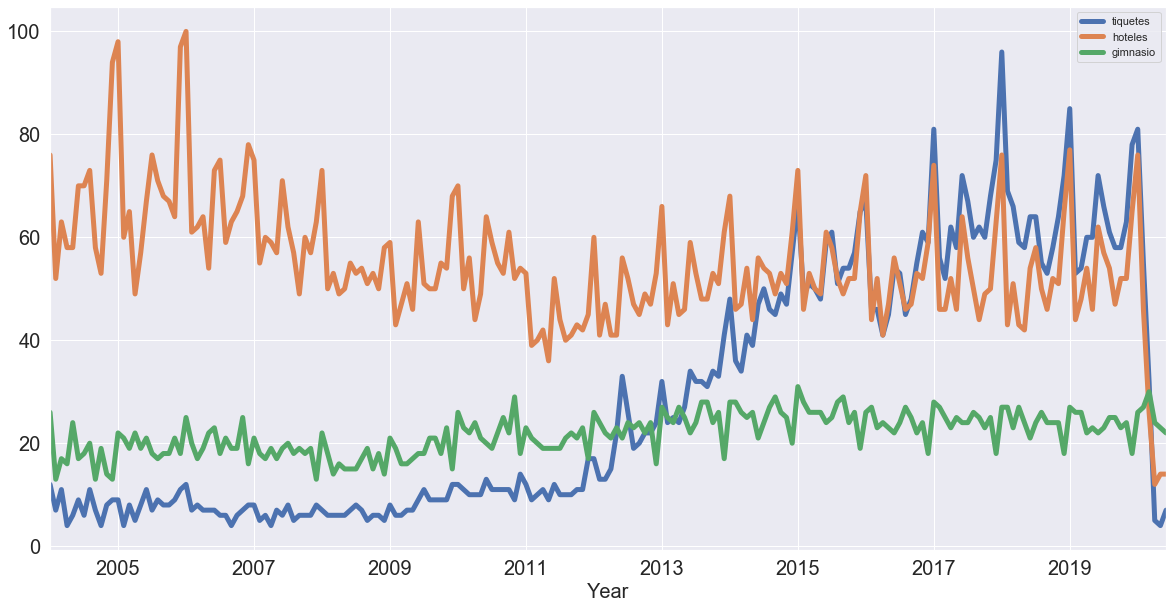

In [32]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

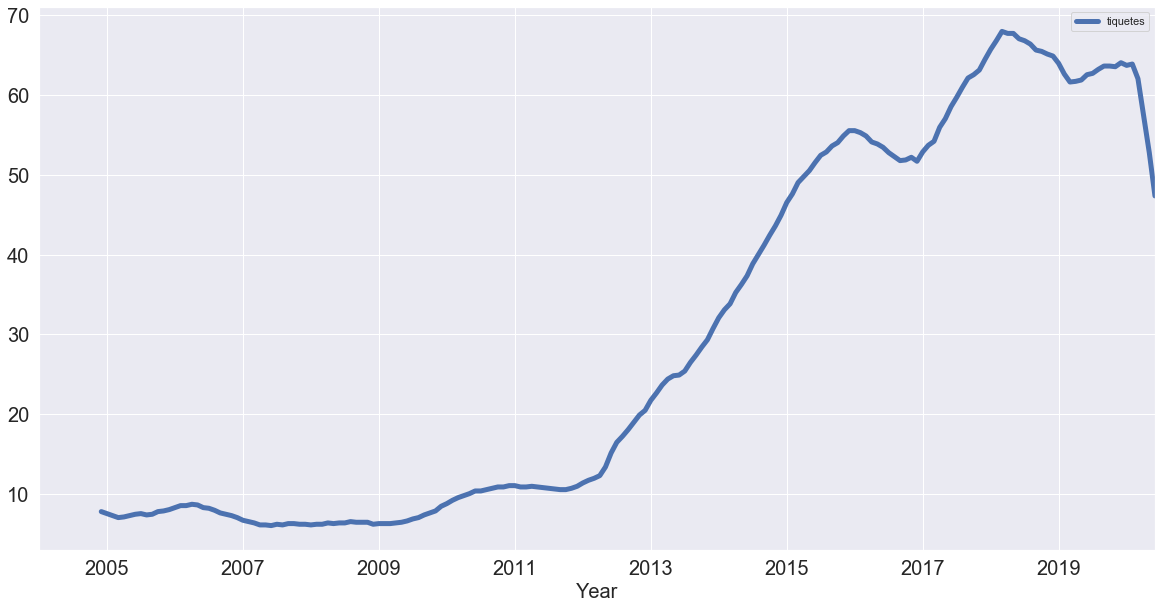

In [36]:
tiquetes = df[['tiquetes']]
tiquetes.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Removiendo la estacionalidad podemos observar el crecimiento de búsquedas a partir del año 2012 y luego una reducción a partir del año 2020 debido a la contingencia generada por el Covid-19. A primera vista la serie parece no tener estacionalidad, sin embargo más adelante realizaremos la prueba de Dickey Fuller para confirmar esta hipótesis.

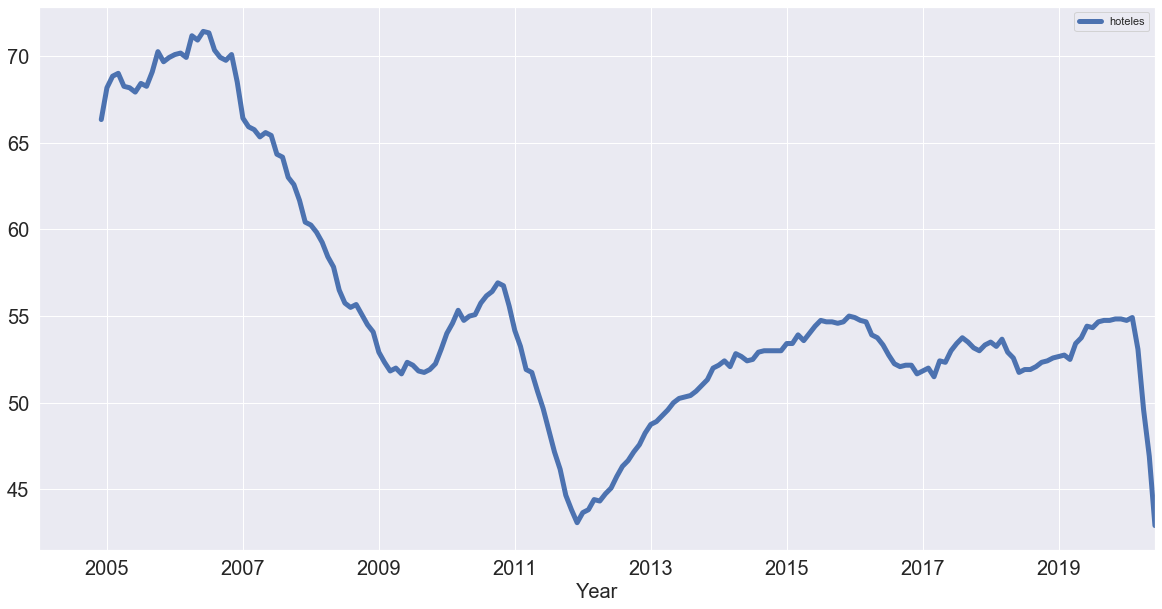

In [37]:
hoteles = df[['hoteles']]
hoteles.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Podemos observar un fénomeno similar a las búsquedas de tiquetes, en donde a partir del año 2012 se presenta un aumento considerable en las búsquedas de vuelos y luego una caída en el 2020 por la contingencia generada por el Covid-19. 

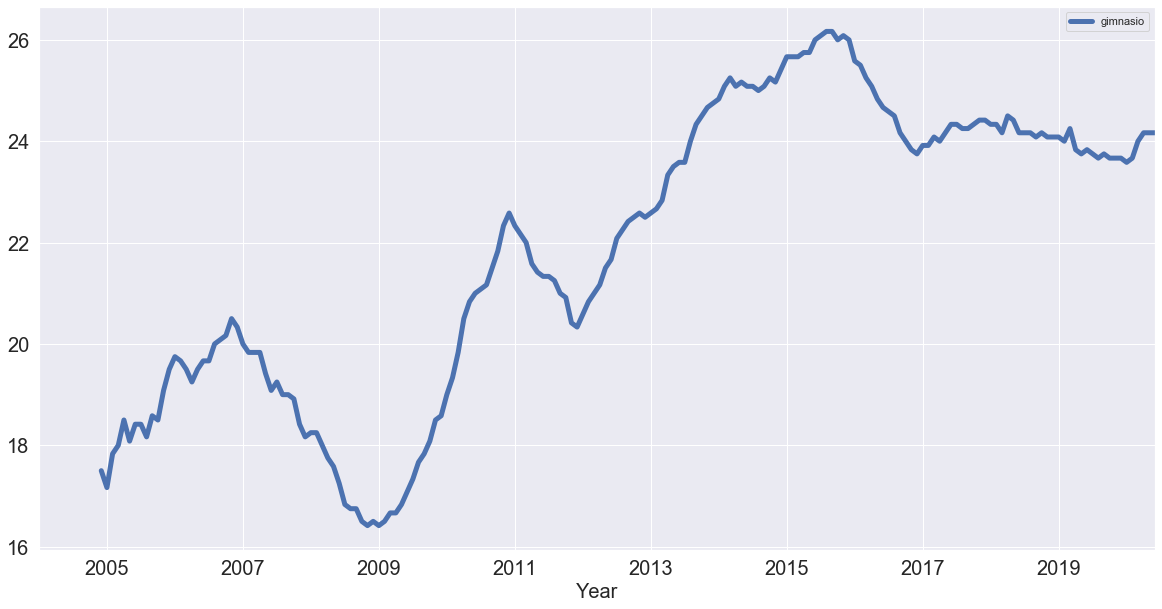

In [38]:
gimnasio = df[['gimnasio']]
gimnasio.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Para las búsquedas de gimnasio, observamos una tendencia al alza a partir del 2009 y adicionalmente vemos que las búsquedas no se han visto afectadas por el Covid-19 a diferencia de las dos series observadas anteriormente.

In [39]:
result = adfuller(df['tiquetes'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.650061
p-value: 0.457009
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [40]:
result = adfuller(df['hoteles'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.297199
p-value: 0.630453
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [41]:
result = adfuller(df['gimnasio'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.456169
p-value: 0.555072
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575


Luego de realizar la prueba de Dickey Fuller para las 3 series analizadas, observamos que con un nivel de significancia del 5% ninguna de las 3 series es estacional dado que el p-value es mayor a mi nivel de significancia. 

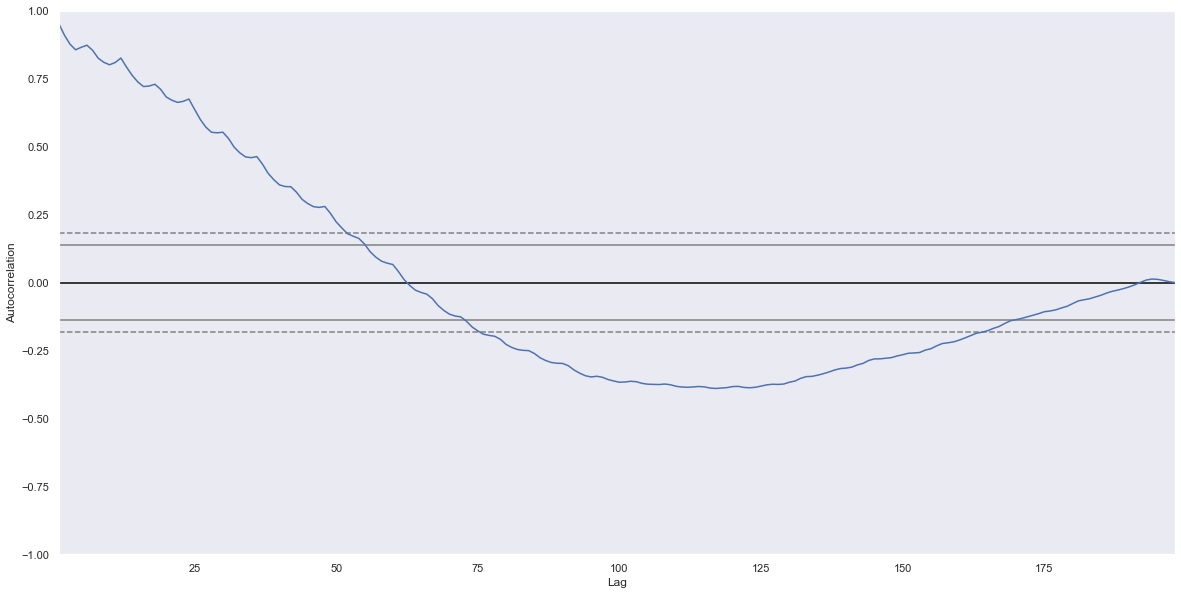

In [42]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(tiquetes);

Tal como observamos en la prueba de Dickey Fuller, la serie no es estacional.

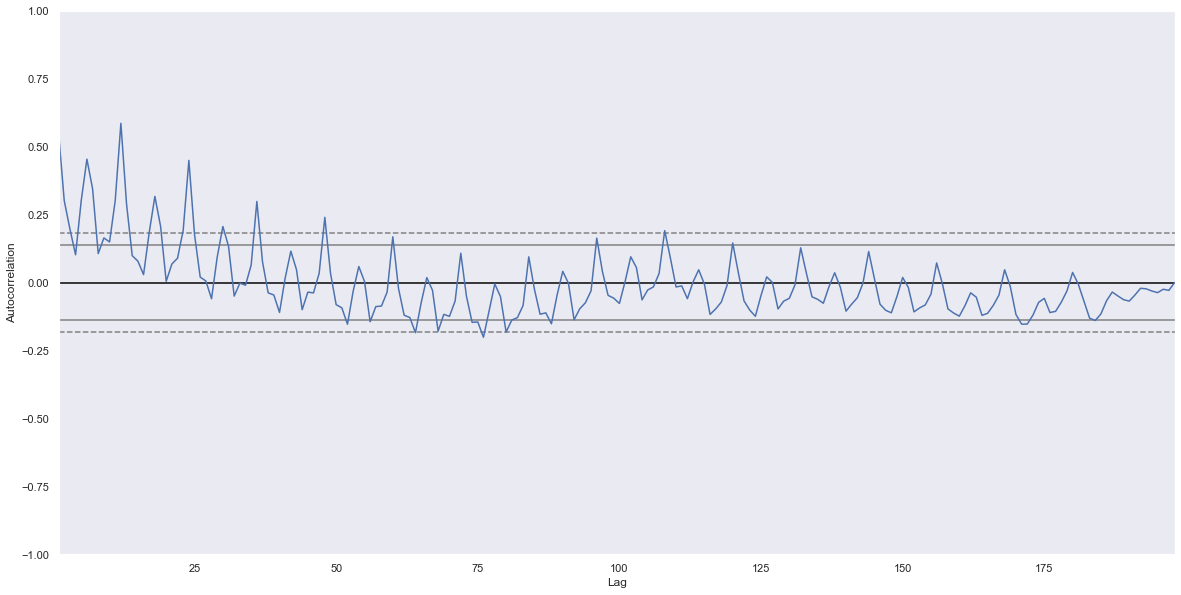

In [43]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(hoteles);

Para la serie de gimnasios vemos autocorrelación significativa para los lags 6, 12, 18 y 24. Por lo cual, podriamos concluir preliminartmente que tiene una estacionalidad de 6 meses, sin embargo como vimos en la prueba de Dickey Fuller esta serie no es estacional.

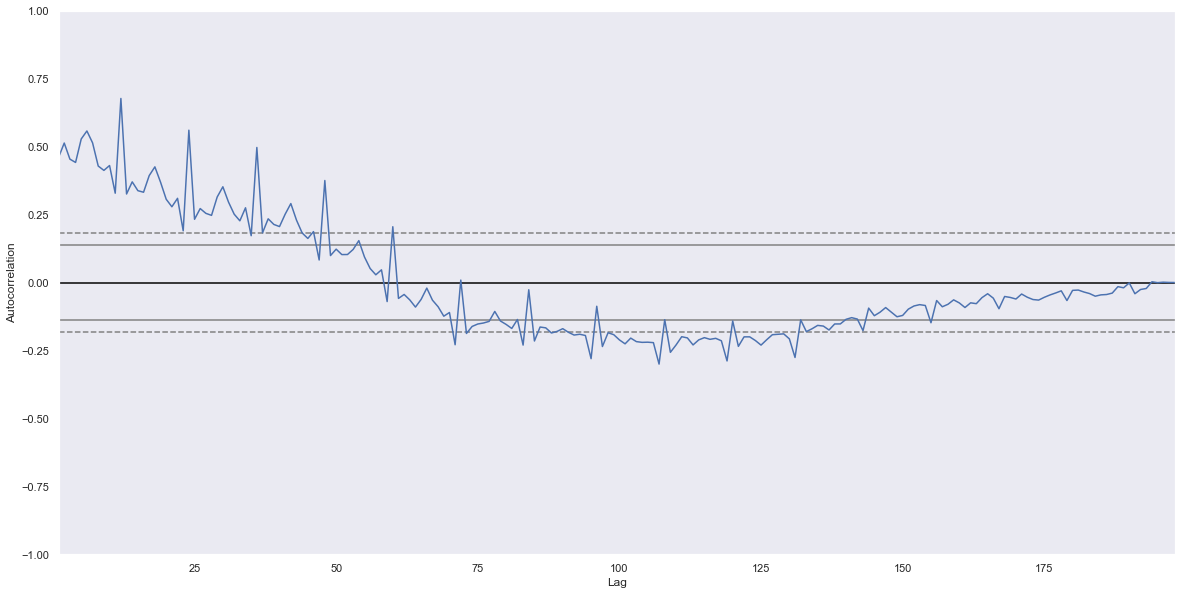

In [44]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(gimnasio);

Para la serie de gimnasios vemos autocorrelación significativa para los lags 12, 24, 36 y 48. Por lo cual, podriamos concluir preliminartmente que tiene una estacionalidad de 12 meses, sin embargo como vimos en la prueba de Dickey Fuller esta serie no es estacional.

Dado que ninguna es estacional, decidimos sacar la diferencia para volverla estacional.

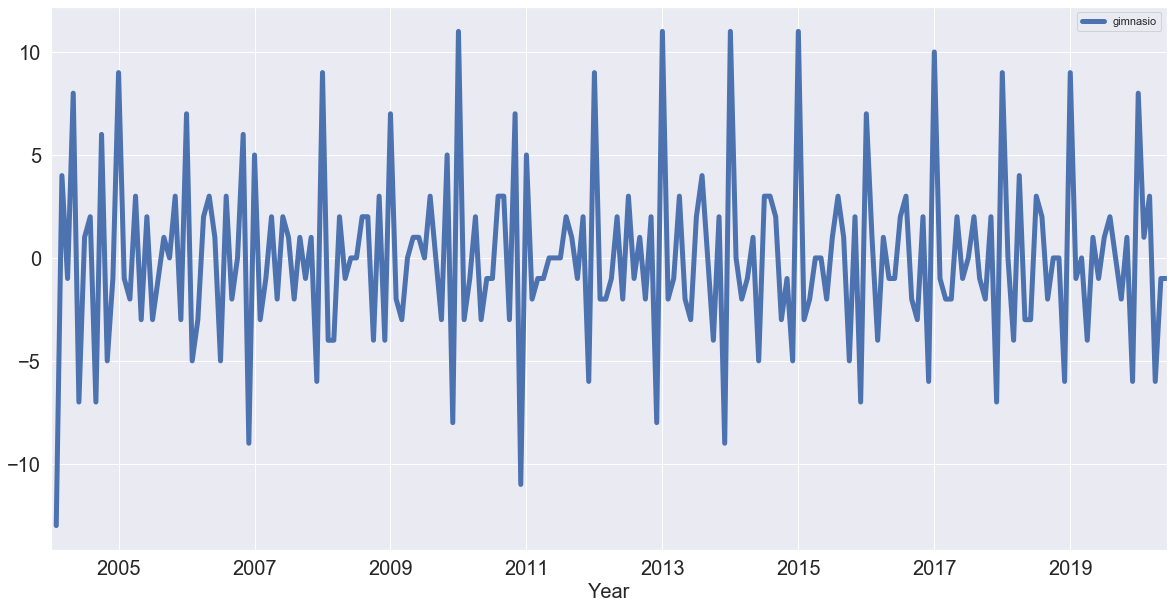

In [59]:
gimnasio.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [58]:
result = adfuller(df['gimnasio'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.712548
p-value: 0.003940
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575


Dados los resultados del autocorrelograma decidimos sacar la diferencia de la serie gimnasio para ver si después de realizar la transformación esta sería una serie estacional. Al realizar la prueba de Dickey Fuller encontramos que con una significancia del 5% al sacar la diferencia la serie se vuelve estacional (p-value < significancia).